# **Machine Learning notebook for Home Garden Assistance**

# Connect to Google Drive to retrive Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
# import library cell
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

Here, we Import all libraries that we need to complete our ML model in all different steps.

---



# Import our Dataset

In [ ]:
frame = pd.read_json('/content/drive/MyDrive/GPModel/Data.JSON')

We import our Dataset as JSON then fit it to Pandas read function to convert it to Dataframe.

---



#Exploratory Data Analysis [EDA]

## 1. The number of records and features (The Shape) of the dataframe

In [ ]:
records, features = frame.shape
print(f"Number of records: {records}")
print(f"Number of features: {features}")

Number of records: 1392
Number of features: 7


## 2. The datatypes of the dataframe

In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1392 non-null   object 
 1   Month        1392 non-null   int64  
 2   Temperature  1392 non-null   float64
 3   Humidity     1392 non-null   float64
 4   Rainfall     1392 non-null   float64
 5   Season       1392 non-null   object 
 6   Result       1392 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 76.2+ KB


## 3. The statistical description of the dataframe

In [ ]:
frame.describe()

,Month,Temperature,Humidity,Rainfall
count,1392.000000,1392.000000,1392.000000,1392.000000
mean,6.500000,30.137572,34.026580,1.416307
std,3.453293,7.470077,12.511564,4.547005
min,1.000000,10.500000,0.000000,0.000000
25%,3.750000,24.000000,25.000000,0.000000
50%,6.500000,30.000000,35.000000,0.000000
75%,9.250000,36.000000,41.000000,1.000000
max,12.000000,48.000000,85.000000,50.000000


## 4. Checking for null values in the dataframe

In [ ]:
nullCount=frame.isnull().sum()
print(f"Total Null Values:\n{nullCount}")

Total Null Values:
City           0
Month          0
Temperature    0
Humidity       0
Rainfall       0
Season         0
Result         0
dtype: int64


## 5. Correlation matrix

In [ ]:
corr=frame.corr()
print(f"Correlation Matrix: \n{corr}")

Correlation Matrix: 
                Month  Temperature  Humidity  Rainfall
Month        1.000000     0.352408 -0.325967  0.032559
Temperature  0.352408     1.000000 -0.625969  0.086863
Humidity    -0.325967    -0.625969  1.000000  0.133396
Rainfall     0.032559     0.086863  0.133396  1.000000


<ipython-input-13-001b547443ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=frame.corr()


## 6. Visualizing of Correlation Matrix

<Axes: >

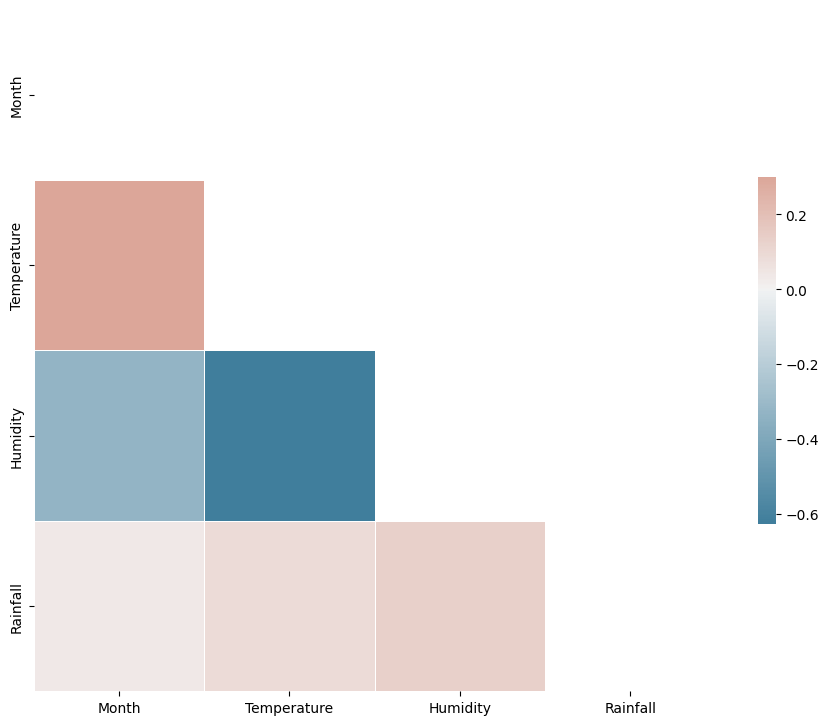

In [ ]:
rs = np.random.RandomState(33)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data preprocessing and Feature engineering


##Feature Extraction

###Because we already did the Correlation matrix we figure out the rainful feature is the least related to the other features.

##Cleaning outliers and imputations data

###Becuase we already did Exploratory Data Analysis we figure out that we did not have any missing or outliers in our dataset that need to be filled or fixed.

##Tranformation

In [ ]:
encoder = LabelEncoder()
frame['City'] = encoder.fit_transform(frame['City'])
frame['Season'] = encoder.fit_transform(frame['Season'])
frame['Result']= frame['Result'].astype("string")


##Normalization

###Because our data do not have wide range and our work flow need use the data in similar, we do not need to perform normalization

# Split data into Training and Testing

##Define X values

In [ ]:
X =frame.drop(columns=['Result','Season','Rainfall'])
X

,City,Month,Temperature,Humidity
0,13,1,21.0,50.0
1,13,2,23.0,45.0
2,13,3,26.0,40.0
3,13,4,29.0,35.0
4,13,5,33.0,30.0
...,...,...,...,...
1387,78,8,38.0,16.0
1388,78,9,35.0,19.0
1389,78,10,30.5,24.0
1390,78,11,26.6,29.0




We will dropped the result because it belong to Y (The target) and Rainful feature because the result of the corrlation matrix and Season after testing that show in feature importans it effect the result negativly


---



##Define y value

In [ ]:
y= frame['Result']
y

0       [{'plant_name': 'Broccoli', 'pros': 'Cool seas...
1       [{'plant_name': 'Broccoli', 'pros': 'Cool seas...
2       [{'plant_name': 'Beans', 'pros': 'Warm season ...
3       [{'plant_name': 'Beans', 'pros': 'Warm season ...
4       [{'plant_name': 'Beans', 'pros': 'Warm season ...
                              ...                        
1387    [{'plant_name': 'Okra', 'pros': 'Heat-tolerant...
1388    [{'plant_name': 'Okra', 'pros': 'Heat-tolerant...
1389    [{'plant_name': 'Okra', 'pros': 'Heat-tolerant...
1390    [{'plant_name': 'Okra', 'pros': 'Heat-tolerant...
1391    [{'plant_name': 'Okra', 'pros': 'Heat-tolerant...
Name: Result, Length: 1392, dtype: string

## Split and Assign Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2);

#Define algorithms

## Assign each algorithm to variable name

In [ ]:
DT= DecisionTreeClassifier()
KNN= KNeighborsClassifier()
NB = GaussianNB()
SVMC =svm.SVC()
RFC = RandomForestClassifier()
ANN=MLPClassifier()

## Fitting X and y to each algorithm

In [ ]:
DT.fit(X_train.values,y_train.values)
KNN.fit(X_train.values,y_train.values)
NB.fit(X_train.values,y_train.values)
SVMC.fit(X_train.values,y_train.values)
RFC.fit(X_train.values,y_train.values)
ANN.fit(X_train.values,y_train.values)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

# Feature Selection
Only tree-based algorithms mainly focus on the feature importance technique to give a visualization of the tree structure.


---



## Decision Tree Feature Importance

In [ ]:
DT.feature_importances_

array([0.3415771 , 0.25920103, 0.19570193, 0.20351994])

## Random Forest Feature Importance

In [ ]:
RFC.feature_importances_

array([0.41547891, 0.15571212, 0.25405138, 0.17475759])

# Model Development
In this section we will experiment different models and report observations in terms of predictions and training time


---



## Decision Tree

In [ ]:
start = time.time()
DTRes=DT.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",DTRes)

Run time [s]:  0.0012247562408447266
predictions:  ["[{'plant_name': 'Beans', 'pros': 'Versatile', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Corn', 'pros': 'Sweet', 'cons': 'Needs full sun', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Cucumber', 'pros': 'Refreshing', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Eggplant', 'pros': 'Nutritious', 'cons': 'Needs heat', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Melon', 'pros': 'Sweet', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 2}]"]


## K-nearest Neighbors

In [ ]:
start = time.time()
KNNRes=KNN.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",KNNRes)

Run time [s]:  0.001764059066772461
predictions:  ["[{'plant_name': 'Beans', 'pros': 'Versatile', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Chili Peppers', 'pros': 'Spicy', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Cucumber', 'pros': 'Refreshing', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Eggplant', 'pros': 'Nutritious', 'cons': 'Needs heat', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Melon', 'pros': 'Sweet', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 2}]"]


## Naive Bayes

In [ ]:
start = time.time()
NBRes=NB.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",NBRes)

Run time [s]:  0.016364336013793945
predictions:  ["[{'plant_name': 'Rose Bush', 'pros': 'Beautiful blooms', 'cons': 'Prone to pests', 'watering': 2, 'ease_of_farming': 2}, {'plant_name': 'Lavender', 'pros': 'Fragrant', 'cons': 'Prone to pests', 'watering': 2, 'ease_of_farming': 2}, {'plant_name': 'Tomato', 'pros': 'Edible', 'cons': 'Requires support', 'watering': 2, 'ease_of_farming': 2}, {'plant_name': 'Marigold', 'pros': 'Colorful flowers', 'cons': 'Can attract aphids', 'watering': 2, 'ease_of_farming': 1}, {'plant_name': 'Zinnia', 'pros': 'Bright and showy', 'cons': 'Requires deadheading', 'watering': 2, 'ease_of_farming': 1}]"]


## Random Forest

In [ ]:
start = time.time()
RFCRes=RFC.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",RFCRes)

Run time [s]:  0.009128570556640625
predictions:  ["[{'plant_name': 'Beans', 'pros': 'Versatile', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Corn', 'pros': 'Sweet', 'cons': 'Needs full sun', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Cucumber', 'pros': 'Refreshing', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Eggplant', 'pros': 'Nutritious', 'cons': 'Needs heat', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Melon', 'pros': 'Sweet', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 2}]"]


## Support Vector Machine

In [ ]:
start = time.time()
SVMRes=SVMC.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",SVMRes)

Run time [s]:  0.004249095916748047
predictions:  ["[{'plant_name': 'Tomato', 'pros': 'Warm-season crop, versatile', 'cons': 'Can be susceptible to pests and diseases', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Bell Pepper', 'pros': 'Warm-season crop, versatile', 'cons': 'Can be susceptible to pests and diseases', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Eggplant', 'pros': 'Warm-season crop, versatile', 'cons': 'Can be susceptible to pests and diseases', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Squash', 'pros': 'Warm-season crop, versatile', 'cons': 'Can be susceptible to pests and diseases', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Melon', 'pros': 'Warm-season crop, sweet', 'cons': 'Can be susceptible to pests and diseases', 'watering': 4, 'ease_of_farming': 2}]"]


## Artificial Neural Networks

In [ ]:
start = time.time()
ANNRes=ANN.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",ANNRes)

Run time [s]:  0.0007658004760742188
predictions:  ["[{'plant_name': 'Okra', 'pros': 'Heat-tolerant, Nutritious', 'cons': 'Needs full sun, Needs support', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Watermelon', 'pros': 'Heat-tolerant, Refreshing', 'cons': 'Needs full sun, Needs a lot of space', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Cantaloupe', 'pros': 'Heat-tolerant, Sweet', 'cons': 'Needs full sun, Needs support', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Eggplant', 'pros': 'Heat-tolerant, Nutritious', 'cons': 'Needs full sun, Heavy feeder', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Bell Pepper', 'pros': 'Heat-tolerant, Easy to grow', 'cons': 'Needs full sun, Frequent watering needed', 'watering': 5, 'ease_of_farming': 2}]"]


# Result reporting

After we developed our models we report the results of our testing. Also, we used the Accuracy and Training Time averages to compare between our models.

But there are a lot of Metrics like F1 score, Confusion matrix, precision and recall that we tried by many diffrent ways but they are not suitable for our case because our y (Result) is not numiric or have limited range as what are needed as requirements of these Metrics.


## *Average Accuracy*

> Decision Tree: %76

> K-Nearest Neighbors: %48

> Naive Bayes: %46

> Random Forest: %64

> Support Vector Machine: %22

> Artificial Neural Network: %42













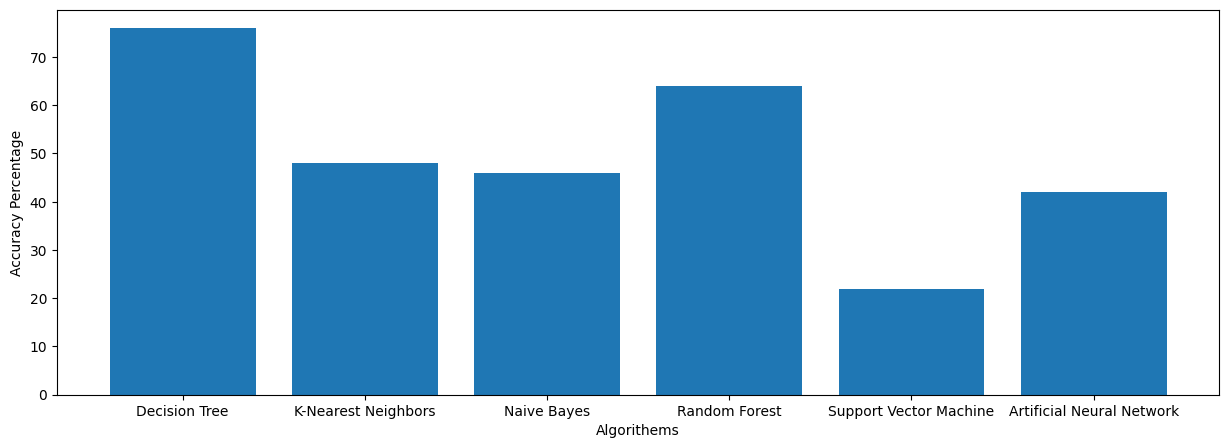

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
Algorithems=['Decision Tree','K-Nearest Neighbors','Naive Bayes','Random Forest','Support Vector Machine','Artificial Neural Network']
AlgorithemsRate=[76,48,46,64,22,42]
ax.bar(Algorithems,AlgorithemsRate)
ax.set_ylabel('Accuracy Percentage')
ax.set_xlabel('algorithms')
plt.show()

## *Average Training Time*

> Decision Tree: 0.00091s

> K-Nearest Neighbors: 0.00428s

> Naive Bayes: 0.02578s

> Random Forest: 0.01054s

> Support Vector Machine: 0.00862s

> Artificial Neural Network: 0.00346s

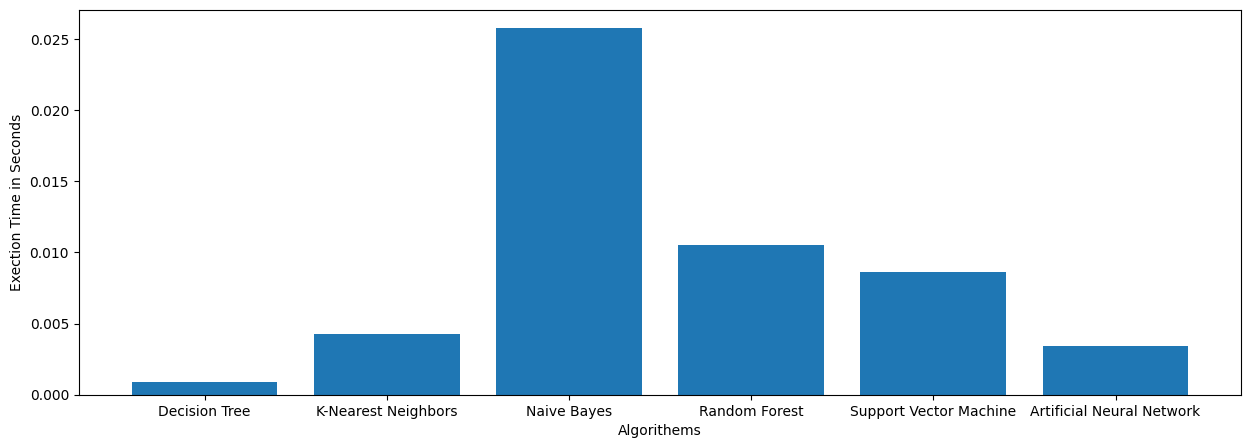

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
Algorithems=['Decision Tree','K-Nearest Neighbors','Naive Bayes','Random Forest','Support Vector Machine','Artificial Neural Network']
AlgorithemsExectionTime=[0.00091,0.00428,0.02578,0.01054,0.00862,0.00346]
ax.bar(Algorithems,AlgorithemsExectionTime)
ax.set_ylabel('Exection Time in Seconds')
ax.set_xlabel('algorithms')
plt.show()

# Analysis of Decision Tree Before Hyper-parameter Tuning

## The depth of Decision Tree

In [ ]:
print(DT.get_depth())

39


## The number of tree leaves

In [ ]:
print(DT.get_n_leaves())

893


## Average Accuracy

### %**74**

## Average Training Time

### **0.00091s**

# Hyper-parameter Tuning for Decision Tree

## Redefine Decision Tree

In [ ]:
DT=DecisionTreeClassifier(criterion="entropy", splitter='best')

## Fitting X and y in Decision Tree

In [ ]:
DT.fit(X_train.values,y_train.values)

DecisionTreeClassifier(criterion='entropy')

## Predict from Decision Tree after Hyper-parameter Tuning

In [ ]:
start = time.time()
DTRes=DT.predict([[114,5,33.0,30.0]])
end = time.time()
print("Run time [s]: ",end-start)
print("predictions: ",DTRes)

Run time [s]:  0.0003705024719238281
predictions:  ["[{'plant_name': 'Beans', 'pros': 'Versatile', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Corn', 'pros': 'Sweet', 'cons': 'Needs full sun', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Cucumber', 'pros': 'Refreshing', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 1}, {'plant_name': 'Eggplant', 'pros': 'Nutritious', 'cons': 'Needs heat', 'watering': 4, 'ease_of_farming': 2}, {'plant_name': 'Melon', 'pros': 'Sweet', 'cons': 'Need full sun', 'watering': 4, 'ease_of_farming': 2}]"]


# Analysis of Decision Tree After Hyper-parameter Tuning

## The depth of Decision Tree

In [ ]:
print(DT.get_depth())

12


## The number of tree leaves

In [ ]:
print(DT.get_n_leaves())

907


## Average Accuracy

### **%80**

## Average Training Time

### **0.00036s**

# Saving The model

In this section we will save the model that we wish to use per concluding results. When dealing with Scikit learn two popular approaches for saving the models are Joblib and Pickle. It is good to note that pickle sufferes from security issues. Here is an article to show the difference between the two:
https://mljar.com/blog/save-load-scikit-learn-model/

In [ ]:
# To Do: Save the model